## the point of this project is to classify the number 2 from the MNIST dataset.
8x8 images will be used.
1. Get the images

1. Resize them if necessary
1. Display them to check that it is doable :)
1. Assign 1 if the number is 2, 0 otherwise.
1. Add the bias
1. Create the w vector of weights
1. for each number (j) in the sample set
    1. compute f(w.xj)=yj
    1. update weight : w(t+1) = wi(t) + (dj - yj(t))xji
    
1. simplify code => use cell ?
1. Improve algorithm to test for each digit 0..9 and decide which is what according to score.
    - use a vector of size 10, with all zeros except the desired digit at 1.
    

    

Get the images


In [9]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.misc

%matplotlib inline

mndata = MNIST('./data')
images, labels = mndata.load_training()

5000
5000
time t=0 digit=0, y=0.1387785687523417, delta= [-0.13877857]
time t=1 digit=0, y=-0.05289121974331664, delta= [ 0.05289122]
time t=2 digit=0, y=-0.05750881816953142, delta= [ 0.05750882]
time t=3 digit=0, y=-0.054350294044577786, delta= [ 0.05435029]
time t=4 digit=0, y=-0.05112329292145588, delta= [ 0.05112329]
time t=5 digit=0, y=-0.04840674340549099, delta= [ 0.04840674]
time t=6 digit=0, y=-0.046088830209062646, delta= [ 0.04608883]
time t=7 digit=0, y=-0.044026368577939665, delta= [ 0.04402637]
time t=8 digit=0, y=-0.042124288716930185, delta= [ 0.04212429]
time t=9 digit=0, y=-0.04032823253328683, delta= [ 0.04032823]
time t=10 digit=0, y=-0.0386092766277821, delta= [ 0.03860928]
time t=11 digit=0, y=-0.036952901720044035, delta= [ 0.0369529]
time t=12 digit=0, y=-0.03535230040062454, delta= [ 0.0353523]
time t=13 digit=0, y=-0.033804569483164855, delta= [ 0.03380457]
time t=14 digit=0, y=-0.03230862023823981, delta= [ 0.03230862]
time t=15 digit=0, y=-0.030864068501267

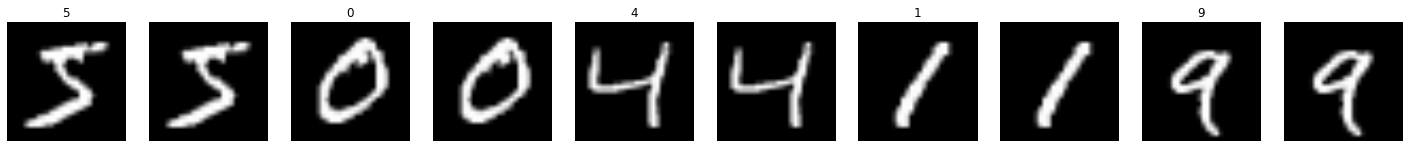

In [10]:
datasetsize = 5000
images = images[0:datasetsize]
labels = labels[0:datasetsize]
print(len(labels))
print(len(images))

digitsize = 28

# convert into an array of array of pixel.
img = np.array(images).reshape(len(images),28,28)


# pre-init
img8x8 = []
for n in range(len(images)):
    displayimg = sp.misc.imresize(img[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg = displayimg.reshape(digitsize*digitsize) # reshape the 2x2 array into a simple pixel vector
    img8x8.append(displayimg)

# Plot the training dataset
plt.gray()
fig = plt.figure(figsize=(25,25))
for n in range(5):
    a = plt.subplot(10,10,(n*2)+1)
    plt.title(labels[n])

    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(img[n])
    #print(displayimg)
    a = plt.subplot(10,10,(n*2)+2)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(img8x8[n].reshape(digitsize,digitsize))


# set values in the [0;1] interval instead of [0;255]
img8x8 = np.array(img8x8)/255
labels = np.array(labels).reshape(len(labels), 1)

#Process labels.
# work specifically to find "2" digit... so set 1 for 2 and 0 for other
def prepare_labels(a):
    if a == 2:
        return 1
    return 0
    
vfunc = np.vectorize(prepare_labels)
labels = vfunc(labels)
input_vectors = np.append(img8x8, labels, axis=1)
#print(input_vectors)

# create weights vector
w = np.ones([digitsize**2+1])
biases = np.ones((digitsize**2,1))
digits = np.insert(img8x8, 0, 1, axis=1) # insert 1s in 0th columns of each row
#print(img8x8[0])
#print(img8x8[1])
#print(digits[0])
#print(digits[1])

t = 0
delta = 100
while t < 100 and abs(delta)>0.000001:
    for j in range(len(digits)):
        y = np.dot(w,digits[j])/(digitsize**2+1)
        delta = labels[j] - y
        inc = digits[j] * delta
        
        if j%50000==0:
            print('time t={} digit={}, y={}, delta= {}'.format(t, j, y, delta))
        #print('inc = {}'.format(inc)
        w = w + inc
        #print('New weights are : {}'.format(w))
    t += 1   
    
    
#get rid of bias weight
w = w[1:]


### now use the weight found at the previous step to guess some digits...


In [11]:
mndata = MNIST('./data')
images_test, labels_test = mndata.load_testing()
print("Test set size is : {}".format(len(images_test)))

Test set size is : 10000


10000
10000
true_positive : 899
true_negative : 8358
false_positive :  610
false_negative :  133
Accuracy : 92.57%


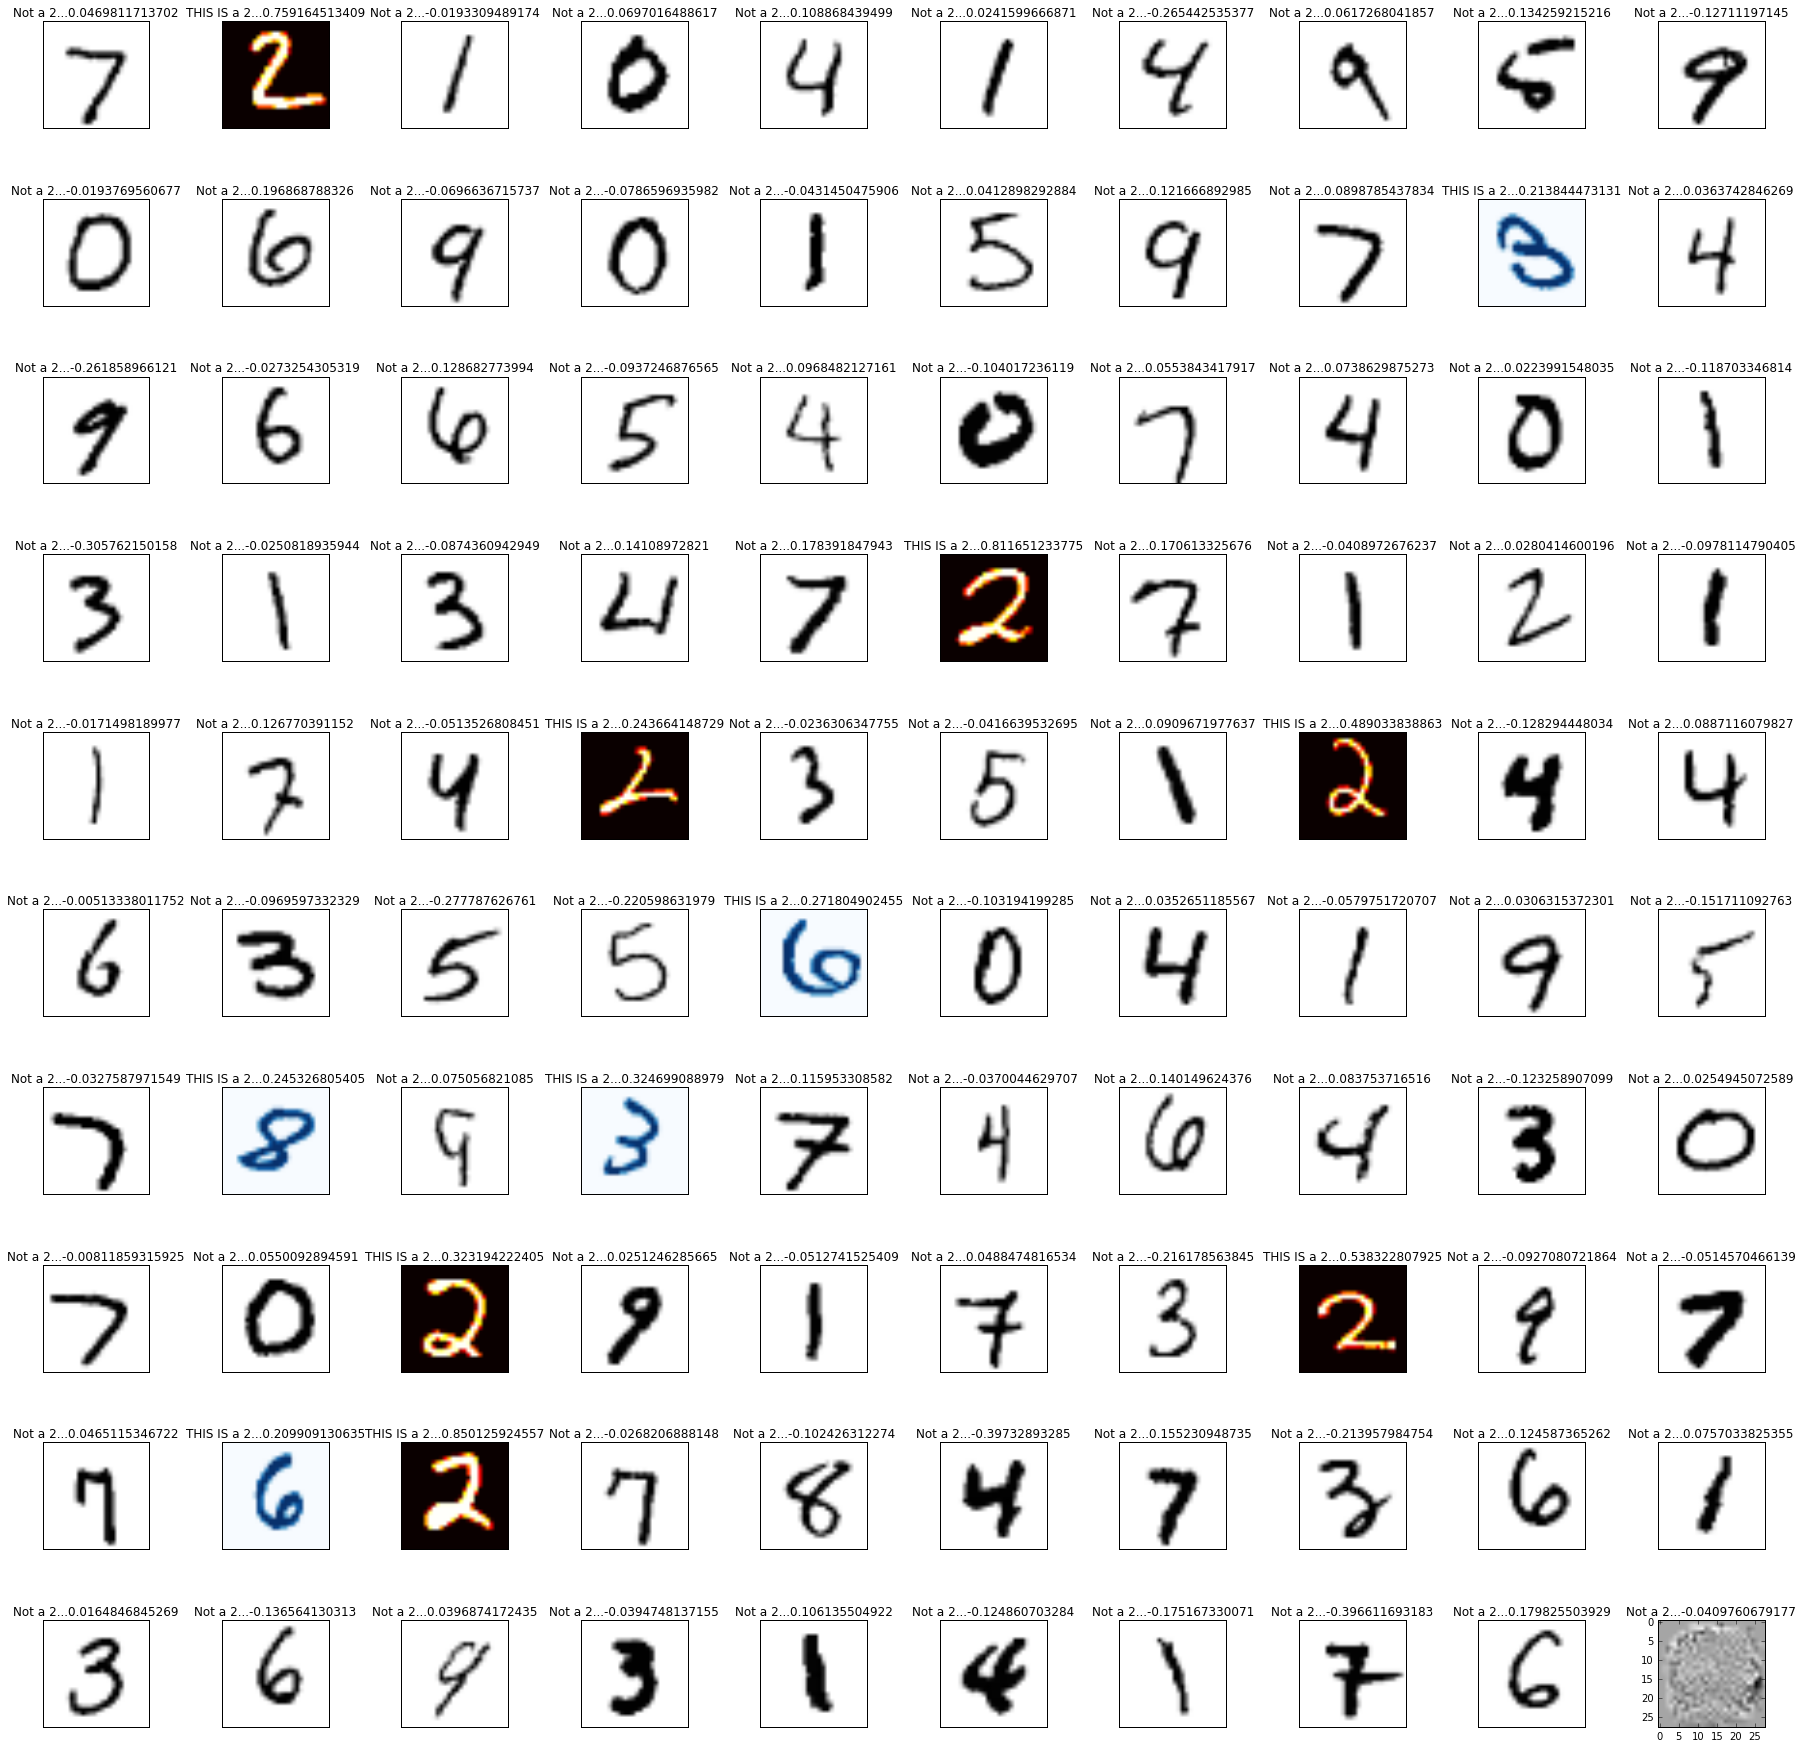

In [12]:
testsetsize = 10000
images_test = images_test[0:testsetsize]
labels_test = labels_test[0:testsetsize]
digitsize = 28
print(len(labels_test))
print(len(images_test))
#print(images[0])
img_test = np.array(images_test).reshape(len(images_test),28,28)

#print('w used is {}'.format(w))

plt.gray()
fig = plt.figure(figsize=(25,25))
img8x8_test = []

# pre-init
for n in range(len(images_test)):
    displayimg_test = sp.misc.imresize(img_test[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg_test = displayimg_test.reshape(digitsize*digitsize)

    img8x8_test.append(displayimg_test)

img8x8_test_norm = np.array(img8x8_test)/255

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0


for n in range(testsetsize):
    value = np.dot(w,img8x8_test_norm[n])/digitsize**2

    if value > 0.2:
        if labels_test[n] == 2:
            true_positive += 1
        else:
            false_positive += 1
    else:
        if labels_test[n] == 2:
            false_negative += 1
        else:
            true_negative += 1
        
for n in range(100):
    value = np.dot(w,img8x8_test_norm[n])/digitsize**2
    
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    a = plt.subplot(10,10,n+1)
    plt.imshow(img8x8_test[n].reshape(digitsize,digitsize))

    if value > 0.2:
        plt.title('THIS IS a 2...' + str(value))
        if labels_test[n] == 2:
            plt.set_cmap('hot')
        else:
            plt.set_cmap('Blues')
    else:
        plt.title('Not a 2...' + str(value))
        plt.set_cmap('Greys')    

plt.tight_layout()

#print(img8x8)
labels_test = np.array(labels_test).reshape(len(labels_test), 1)

print('true_positive :', true_positive)
print('true_negative :', true_negative)
print('false_positive : ', false_positive)
print('false_negative : ', false_negative)
print('Accuracy : {}%'.format(100*(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)))

# plot the w vector
wimg = w.reshape(digitsize, digitsize)
plt.imshow(wimg*100)